# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_json = []

for city in cities:

    query_url = url + "appid=" + weather_api_key + "&q=" + city

    # Get weather data
    weather_response = requests.get(query_url)
    local_json = weather_response.json()

    # Get the temperature from the response
    if (local_json['cod'] == '404'):
        print("city not found")
    else:
        print ("Process Record " + str(local_json['id']) + "|" + local_json['name'])
        weather_json.append(local_json)
        


Process Record 4231997|Avera
Process Record 6185377|Yellowknife
Process Record 5106841|Albany
Process Record 5122534|Jamestown
Process Record 5880054|Barrow
Process Record 3883457|Lebu
Process Record 1521315|Līsakovsk
Process Record 4004293|Ixtapa
Process Record 4030556|Rikitea
Process Record 3424607|Tasiilaq
Process Record 3833367|Ushuaia
Process Record 3491161|Bull Savanna
Process Record 3366880|Hermanus
city not found
Process Record 2194098|Ahipara
city not found
Process Record 779554|Honningsvåg
Process Record 2110227|Butaritari
Process Record 3382160|Cayenne
Process Record 964420|Port Elizabeth
Process Record 2214432|Nālūt
Process Record 2450173|Taoudenni
Process Record 4020109|Atuona
Process Record 4013679|Coahuayana Viejo
Process Record 5983720|Iqaluit
Process Record 964432|Port Alfred
Process Record 1885823|Jiangyou
Process Record 3441292|Paso de Carrasco
Process Record 5546220|Saint George
Process Record 6201424|Mataura
Process Record 57000|Hobyo
Process Record 2021017|Kysyl-S

Process Record 3984997|San Quintín
Process Record 2082539|Merauke
Process Record 1685166|Suyan
Process Record 3385658|Uruçuí
Process Record 3372964|Lagoa
Process Record 4747845|Blacksburg
Process Record 1078553|Ampanihy
Process Record 2396518|Port-Gentil
Process Record 110690|Abhā
Process Record 1129516|Qarqīn
Process Record 2537881|Safi
Process Record 2126785|Belaya Gora
Process Record 4021858|Guerrero Negro
Process Record 2643044|Margate
Process Record 1273193|Deoria
Process Record 2289983|Dimbokro
Process Record 3430545|Morón
Process Record 2070998|Geraldton
Process Record 4255151|Bud
city not found
Process Record 583573|Russkiy Aktash
Process Record 3115824|Muros
Process Record 5855927|Hilo
Process Record 2015913|Suntar
Process Record 3382226|Camopi
city not found
Process Record 3463271|Flores da Cunha
Process Record 3394023|Natal
Process Record 3664525|Codajás
Process Record 6089245|Norman Wells
Process Record 3448903|São João da Barra
Process Record 2025256|Chumikan
Process Recor

Process Record 986717|Kruisfontein
Process Record 107304|Buraidah
city not found
Process Record 8079926|Labuhan
Process Record 6690296|Saint-Joseph
Process Record 3974771|Praxédis Guerrero
Process Record 3572189|High Rock
Process Record 5746545|Portland
Process Record 1152194|Mae Sai
Process Record 186180|Moyale
Process Record 5767918|Pierre
Process Record 1687894|Santa Rosa
Process Record 3466165|Cidreira
Process Record 5905393|Bonavista
Process Record 3628503|San Carlos
Process Record 3653967|Muisne
Process Record 5110365|Broome
Process Record 5364271|Laguna
Process Record 286245|Sur
Process Record 2121025|Srednekolymsk
Process Record 2294915|Takoradze
Process Record 927856|Livingstonia
Process Record 3395503|Marabá
Process Record 2986110|Pont-Sainte-Maxence
Process Record 3139597|Sistranda
Process Record 1806696|Humen
Process Record 352733|Marsá Maţrūḩ
Process Record 2017215|Sangar
Process Record 3404558|Cabedelo
Process Record 1529660|Aksu
city not found
Process Record 487928|Novik

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
dframe = pd.DataFrame.from_records(weather_json)
dframe.to_csv("city.csv")

#dframe.head(5)

# Clean up nested jsons
lat_lon_df = pd.DataFrame.from_records(dframe['coord'])
weather_df = pd.DataFrame.from_records(pd.DataFrame.from_records(dframe['weather'])[0])
main_df = pd.DataFrame.from_records(dframe['main'])
wind_df = pd.DataFrame.from_records(dframe['wind'])
clouds_df = pd.DataFrame.from_records(dframe['clouds'])
sys_df = pd.DataFrame.from_records(dframe['sys'])

clean_df = pd.DataFrame({"City": dframe['name'],
                         "Lat" : lat_lon_df['lat'], 
                         "Lng" : lat_lon_df['lon'],
                         "Max Temp" : main_df['temp_max'],
                         "Humidity" : main_df['humidity'],
                         "Cloudiness" : clouds_df['all'],
                         "Wind Speed" : wind_df['speed'],
                         "Country" : sys_df['country'],
                         "Date" : dframe['dt']
                        })
clean_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avera,33.19,-82.53,293.15,52,1,2.60,US,1607812214
1,Yellowknife,62.46,-114.35,246.48,75,20,4.60,CA,1607812214
2,Albany,42.60,-73.97,278.15,80,100,1.46,US,1607812214
3,Jamestown,42.10,-79.24,284.26,81,75,4.60,US,1607812048
4,Barrow,71.29,-156.79,255.15,70,1,12.90,US,1607812216


In [104]:
lat_dat = [len(clean_df['Lat']),clean_df['Lat'].mean(),clean_df['Lat'].std(),clean_df['Lat'].min(),clean_df['Lat'].quantile(0.25),clean_df['Lat'].quantile(0.5),clean_df['Lat'].quantile(0.75),clean_df['Lat'].max()]
lng_dat = [len(clean_df['Lng']),clean_df['Lng'].mean(),clean_df['Lng'].std(),clean_df['Lng'].min(),clean_df['Lng'].quantile(0.25),clean_df['Lng'].quantile(0.5),clean_df['Lng'].quantile(0.75),clean_df['Lng'].max()]
max_dat = [len(clean_df['Max Temp']),clean_df['Max Temp'].mean(),clean_df['Max Temp'].std(),clean_df['Max Temp'].min(),clean_df['Max Temp'].quantile(0.25),clean_df['Max Temp'].quantile(0.5),clean_df['Max Temp'].quantile(0.75),clean_df['Max Temp'].max()]
hum_dat = [len(clean_df['Humidity']),clean_df['Humidity'].mean(),clean_df['Humidity'].std(),clean_df['Humidity'].min(),clean_df['Humidity'].quantile(0.25),clean_df['Humidity'].quantile(0.5),clean_df['Humidity'].quantile(0.75),clean_df['Humidity'].max()]
cloud_dat = [len(clean_df['Cloudiness']),clean_df['Cloudiness'].mean(),clean_df['Cloudiness'].std(),clean_df['Cloudiness'].min(),clean_df['Cloudiness'].quantile(0.25),clean_df['Cloudiness'].quantile(0.5),clean_df['Cloudiness'].quantile(0.75),clean_df['Cloudiness'].max()]
wind_dat = [len(clean_df['Wind Speed']),clean_df['Wind Speed'].mean(),clean_df['Wind Speed'].std(),clean_df['Wind Speed'].min(),clean_df['Wind Speed'].quantile(0.25),clean_df['Wind Speed'].quantile(0.5),clean_df['Wind Speed'].quantile(0.75),clean_df['Wind Speed'].max()]
date_dat = [len(clean_df['Date']),clean_df['Date'].mean(),clean_df['Date'].std(),clean_df['Date'].min(),clean_df['Date'].quantile(0.25),clean_df['Date'].quantile(0.5),clean_df['Date'].quantile(0.75),clean_df['Date'].max()]

pd.DataFrame({"Lat" : lat_dat, 
              "Lng" : lng_dat,
               "Max Temp" : max_dat,
               "Humidity" : hum_dat,
               "Cloudiness" : cloud_dat,
               "Wind Speed" : wind_dat,
               "Date" : date_dat
             },
            index = ['count','mean','std','min','25%','50%','75%','max'])

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.252224,16.375895,283.685045,75.468354,56.922242,3.724702,1.607812e+09
std,33.083724,90.038840,17.352399,17.635485,38.608488,2.778434,9.099324e+01
min,-54.800000,-179.170000,227.150000,10.000000,0.000000,0.190000,1.607812e+09
25%,-6.500000,-61.250000,273.150000,67.000000,20.000000,1.660000,1.607812e+09
50%,22.790000,19.770000,289.870000,79.000000,74.000000,3.100000,1.607812e+09
75%,48.650000,99.940000,297.700000,88.000000,94.000000,4.840000,1.607812e+09
max,78.220000,178.420000,304.150000,100.000000,100.000000,16.000000,1.607812e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [75]:
#  Get the indices of cities that have humidity over 100%.


In [76]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

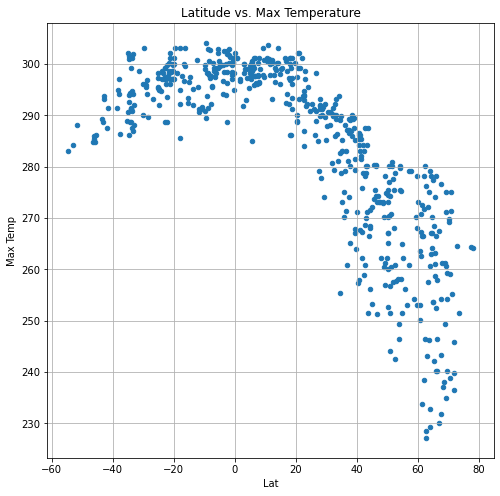

In [77]:
clean_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="Latitude vs. Max Temperature")
plt.show()


## Latitude vs. Humidity Plot

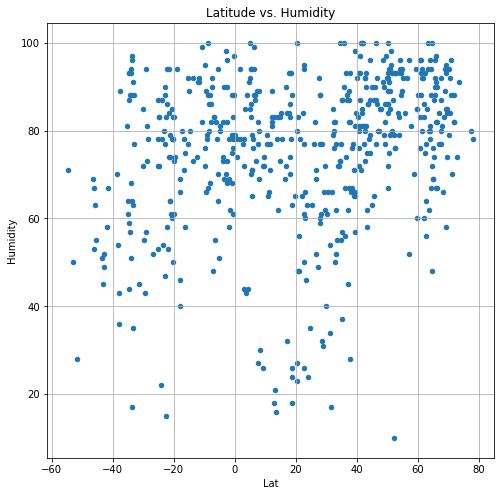

In [78]:
clean_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude vs. Humidity")
plt.show()


## Latitude vs. Cloudiness Plot

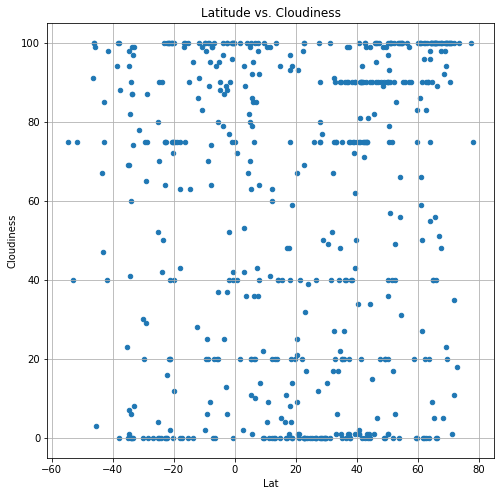

In [79]:
clean_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude vs. Cloudiness")
plt.show()


## Latitude vs. Wind Speed Plot

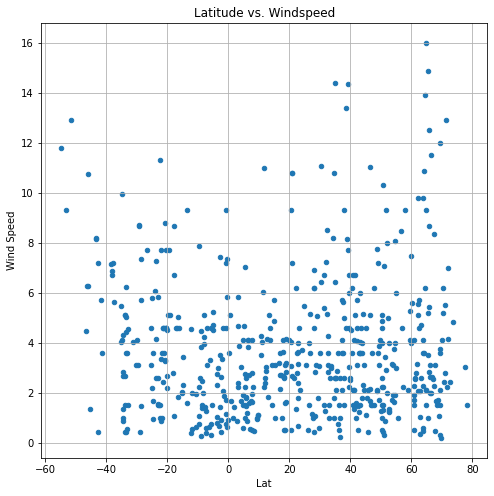

In [80]:
clean_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude vs. Windspeed")
plt.show()


## Linear Regression

In [87]:
north_df = clean_df[clean_df['Lat']>=0.0]
south_df = clean_df[clean_df['Lat']<0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      24.435802
1      68.702861
2      38.663483
3      32.868074
4      60.479261
         ...    
548    32.868074
549    36.766459
550    20.983217
551    41.300347
552    17.796217
Name: Max Temp, Length: 380, dtype: float64
y = -0.95x +302.49
The r-value is: 0.6991070285175617


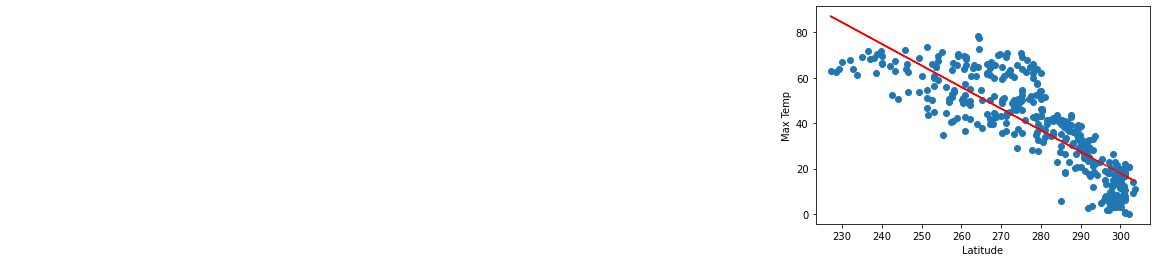

In [88]:
# Add the linear regression equation and line to plot
x_values = north_df['Max Temp']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

5     -35.427796
8     -18.194149
10    -40.456266
12    -31.608705
13    -28.426130
         ...    
524    -8.630508
528   -28.632997
539   -16.586948
543   -19.769524
547   -28.282914
Name: Max Temp, Length: 173, dtype: float64
y = 1.59x +-491.03
The r-value is: 0.32681714658315947


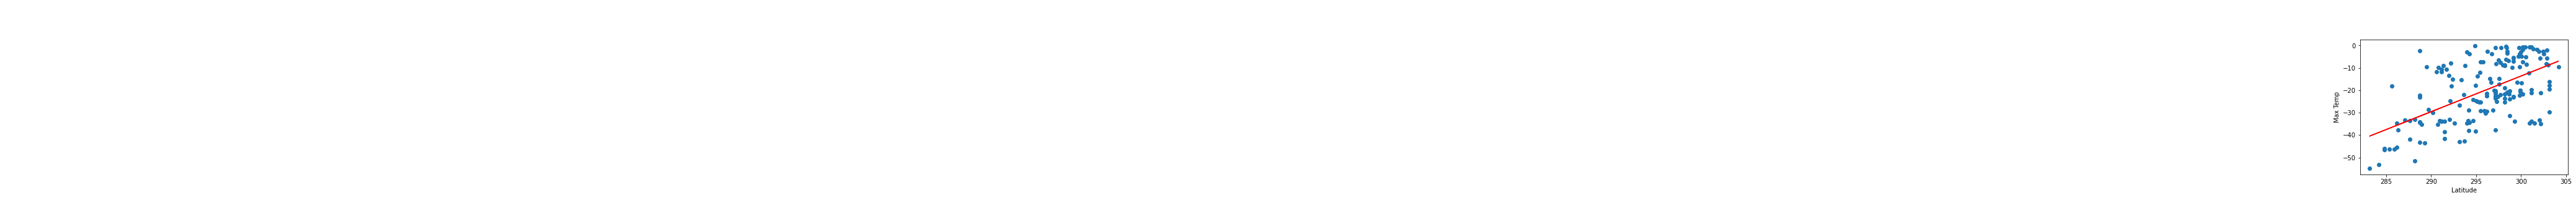

In [92]:
# Add the linear regression equation and line to plot
x_values = south_df['Max Temp']
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      30.545511
1      38.106084
2      39.749687
3      40.078407
4      36.462481
         ...    
548    38.434804
549    44.023054
550    41.722010
551    43.036892
552    40.735848
Name: Humidity, Length: 380, dtype: float64
y = 0.33x +13.45
The r-value is: 0.08062608790928046


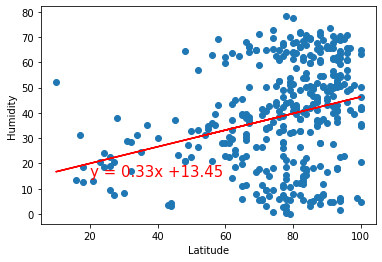

In [95]:
# Add the linear regression equation and line to plot
x_values = north_df['Humidity']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

5     -15.736672
8     -18.208197
10    -20.679722
12    -16.011286
13    -22.602019
         ...    
524   -22.052791
528   -14.912830
539   -14.363603
543   -36.058099
547   -14.088989
Name: Humidity, Length: 173, dtype: float64
y = 0.27x +-40.18
The r-value is: 0.1201915789669936


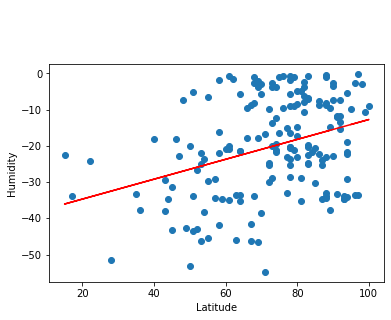

In [97]:
# Add the linear regression equation and line to plot
x_values = south_df['Humidity']
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      31.033594
1      33.692536
2      44.888080
3      41.389472
4      31.033594
         ...    
548    41.389472
549    44.888080
550    43.908470
551    44.888080
552    33.692536
Name: Cloudiness, Length: 380, dtype: float64
y = 0.14x +30.89
The r-value is: 0.07007781854642119


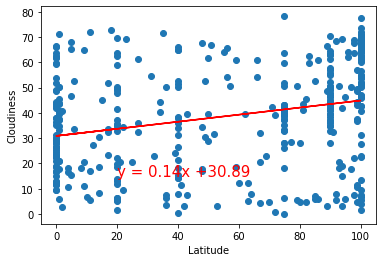

In [96]:
# Add the linear regression equation and line to plot
x_values = north_df['Cloudiness']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


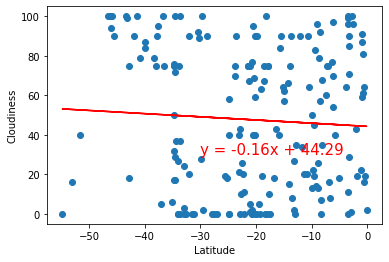

In [30]:
# Add the linear regression equation and line to plot
x_values = south_df['Cloudiness"]
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      37.479895
1      39.711752
2      36.207737
3      39.711752
4      48.973957
         ...    
548    36.921931
549    45.514579
550    37.535692
551    35.080649
552    37.479895
Name: Wind Speed, Length: 380, dtype: float64
y = 1.12x +34.58
The r-value is: 0.02330854065393202


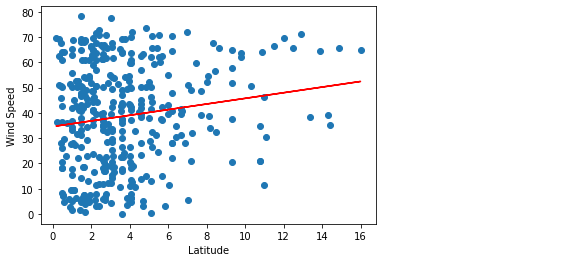

In [99]:
# Add the linear regression equation and line to plot
x_values = north_df['Wind Speed']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

5     -23.564903
8     -23.881705
10    -35.044312
12    -14.713087
13    -23.229466
         ...    
524   -25.540256
528   -16.800252
539   -14.918077
543   -34.112541
547   -15.067160
Name: Wind Speed, Length: 173, dtype: float64
y = -1.86x +-13.05
The r-value is: 0.1388241382576751


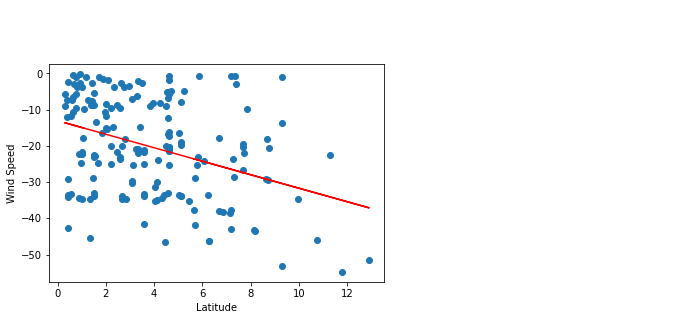

In [98]:
# Add the linear regression equation and line to plot
x_values = south_df['Wind Speed']
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()